# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [56]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📁 **LECTURA DEL DATASET**

In [57]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [58]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [59]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary = df.isnull().sum()  # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (df.isnull().sum() * 100) / len(df)  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columnas y filas que tienen valores faltantes
    missing_info = pd.DataFrame(df[df.isnull().any(axis=1)])  # ← COMPLETAR

    # Filtrar solo las columnas con valores faltantes
    missing_cols = df.columns[df.isnull().any()]  # ← COMPLETAR
    missing_info = missing_info[missing_cols]     # ← COMPLETAR

    return missing_info

In [60]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,estado,Area Construcción,Terreno,Total M²,estadoTran,tipoTran
0,Usada,93.0,93,93.0,NaN,De Venta
1,Usada,NaN,NaN,88.0,NaN,De Venta
2,Usada,NaN,46,46.0,NaN,De Venta
3,Usada,432.0,405,432.0,NaN,De Venta
4,Usada,71.0,71,71.0,NaN,De Venta
...,...,...,...,...,...,...
4550,NaN,NaN,"154,734",154734.0,NaN,De Venta
4551,NaN,NaN,NaN,918.0,NaN,De Venta
4552,NaN,NaN,"2,125",2125.0,NaN,De Venta
4553,NaN,NaN,"2,500",2500.0,NaN,De Venta


In [61]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # ← COMPLETADO
    plt.title("Mapa de calor de valores faltantes")
    plt.xlabel("Columnas")
    plt.ylabel("Filas")
    plt.show()

    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


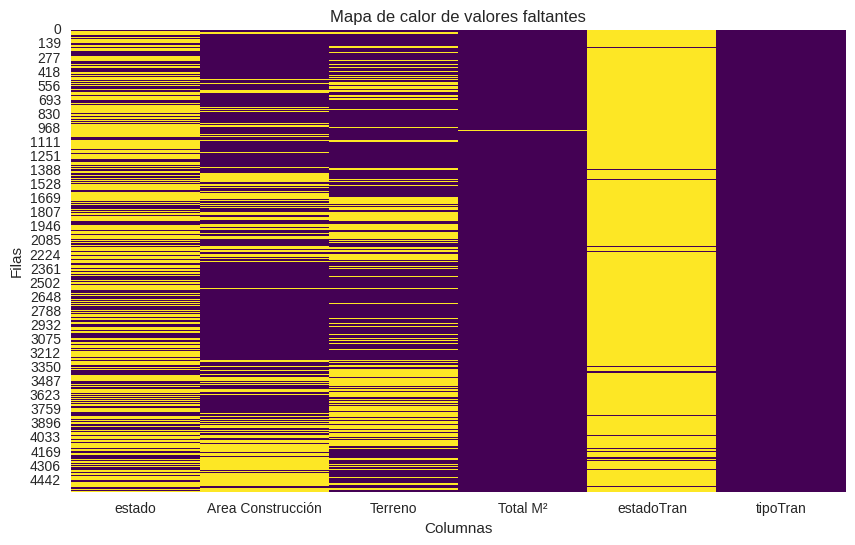

In [62]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(dfValoresFaltantes)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?

Las columnas con mayor porcentaje de valores faltantes es estadoTran y estado

¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

Entre estado y estadoTran existe una cierto patrón, esto puede ser debido a que tiene alguna relación con otras variables.

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

Con el mapa de calor podemos observar que algunos de los valores faltantes se relacionan entre ellos.

En casos como la superficie total puede explicarse si tiene dormitorio o baño.
El estado de los terrenos se puede relacionar con el Año o el precio del mismo.

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [63]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numéricas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df.corr(numeric_only=True)  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # ← COMPLETAR
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()

🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

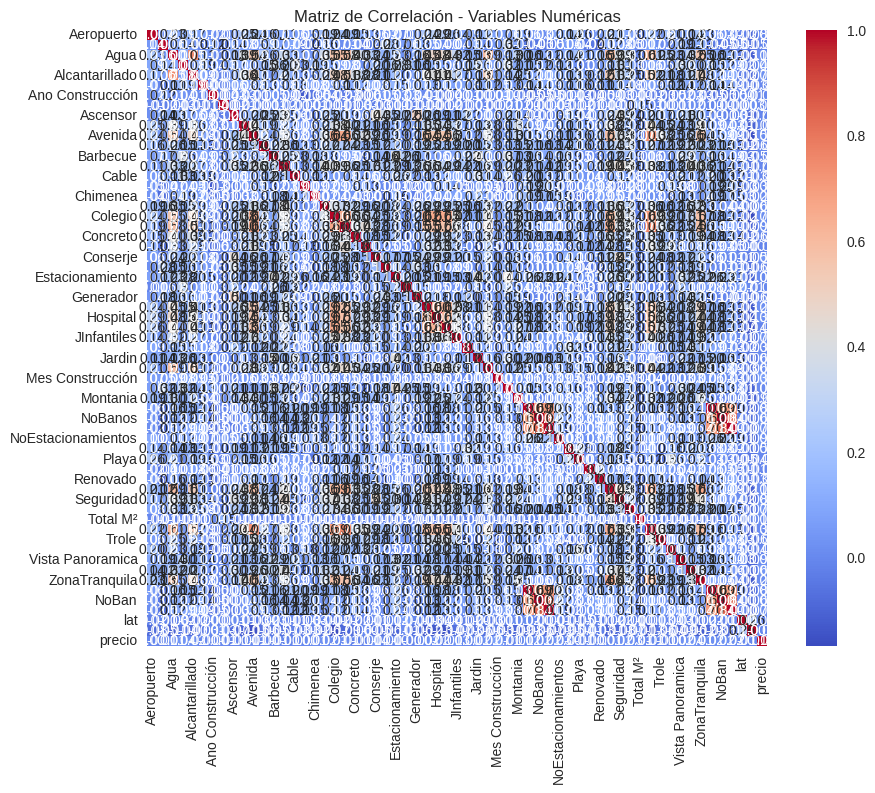

In [64]:
#Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?

Entre "estado" y "estadoTran" son las que tienen más relación y en ese caso los valores faltantes son MAR (Missing at Random)

En el resto de casos podemos considerar MCAR al no ver relación evidente entre las columnas.


¿Qué variables podrían predecir la presencia de valores faltantes?

-En casos como NoBan o NoDorm, puede explicar la superficie total.

-tipo_propiedad, precio, provincia, Aestrenar pueden ayudar a predecir el estado/ estadoTran de los terrenos.

-Aestrenar, precio, Area Construcción pueden predecir el año de construcción.

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [65]:
# Aplique una tecnica adecuada para cada columna de valor faltante.

# Columnas categóricas con muchos valores faltantes
# Se imputan con "Desconocido" porque su ausencia es significativa (MAR)
cols_categoricas_muchos_nan = ['estadoTran', 'estado']
for col in cols_categoricas_muchos_nan:
    # Verificamos si la columna existe en el DataFrame antes de imputar
    if col in df.columns:
        df[col] = df[col].fillna('Desconocido')

# Columnas numéricas
# Se imputan con la mediana para evitar distorsión por outliers
cols_numericas = ['precio', 'Area Construcción', 'NoDormitorios',
                  'NoBanos', 'Total M²', 'Ano Construcción']
for col in cols_numericas:
    if col in df.columns:
        mediana = df[col].median()
        df[col] = df[col].fillna(mediana)

# Columnas binarias (0/1)
# Se imputan con la moda (valor más frecuente)
cols_binarias = ['Agua', 'Alarma', 'Amoblado', 'Ascensor', 'Autopista',
                 'Turismo', 'Vista Panoramica', 'Walk', 'ZonaTranquila']
for col in cols_binarias:
    if col in df.columns:
        # Aseguramos tomar el primer valor de la moda (mode()[0])
        if not df[col].mode().empty:
            moda = df[col].mode()[0]
        else:
            moda = 0 # Asumir ausencia si no hay datos
        df[col] = df[col].fillna(moda)

# Columnas de ubicación (latitud y longitud)
# Se imputan con la media de la columna
if 'lat' in df.columns:
    df['lat'] = df['lat'].fillna(df['lat'].mean())
if 'lng' in df.columns:
    df['lng'] = df['lng'].fillna(df['lng'].mean())

# Columnas categóricas con pocos NaN
# Se imputan con la moda para no introducir categorías inexistentes
cols_categoricas_pocos_nan = ['tipoInv', 'provincia']
for col in cols_categoricas_pocos_nan:
    if col in df.columns:
        if not df[col].mode().empty:
            moda_cat = df[col].mode()[0]
            df[col] = df[col].fillna(moda_cat)

print("Valores faltantes por columna después de la imputación:")
print(df.isnull().sum())

Valores faltantes por columna después de la imputación:
_id           0
estado        0
direccion     0
Aeropuerto    0
Aestrenar     0
             ..
precio        0
price         0
tipoInv       0
tipoTran      3
titulo        0
Length: 71, dtype: int64


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [51]:
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos

#estadoInv y estadoTran
from scipy.stats import chi2_contingency
import pandas as pd

columna_1 = 'tipoInv'
columna_2 = 'estadoTran'

# Crea la tabla de contingencia
contingency_table = pd.crosstab(df[columna_1], df[columna_2])

print(f"Tabla de Contingencia para '{columna_1}' vs '{columna_2}'")
print(contingency_table)
print("\n" + "="*60 + "\n")

# Aplica el test de Chi-cuadrado
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print(f"Resultados del Test Chi-cuadrado (χ2)")
print(f"Estadístico Chi-cuadrado (χ2): {chi2_stat:.4f}")
print(f"Grados de libertad (dof): {dof}")
print(f"Valor p (p-value): {p_value:.6f}")

alpha = 0.05 # Nivel de significancia estándar

if p_value < alpha:
    print(f"El valor p ({p_value:.6f}) es MENOR que {alpha}.")
    print(f"Resultado: Se rechaza la hipótesis nula (H0).")
    print(f"Existe una relación estadísticamente SIGNIFICATIVA entre '{columna_1}' y '{columna_2}'.")
else:
    print(f"El valor p ({p_value:.6f}) es MAYOR que {alpha}.")
    print(f"Resultado: No se puede rechazar la hipótesis nula (H0).")
    print(f"NO hay evidencia de una relación estadísticamente significativa entre '{columna_1}' y '{columna_2}'.")


Tabla de Contingencia para 'tipoInv' vs 'estadoTran'
estadoTran    En Construcción / En Planos  Oferta  PROBABLE  RESERVADA  \
tipoInv                                                                  
Casa                                   33       0         2         26   
Departamento                           29       2         3         14   
Inversión                               2       1         0          0   
Quinta                                  1       1         0          0   
Terreno                                16       2         1          8   

estadoTran    VENDIDA  
tipoInv                
Casa               24  
Departamento       20  
Inversión           1  
Quinta              0  
Terreno            38  


Resultados del Test Chi-cuadrado (χ2)
Estadístico Chi-cuadrado (χ2): 50.3902
Grados de libertad (dof): 16
Valor p (p-value): 0.000020
El valor p (0.000020) es MENOR que 0.05.
Resultado: Se rechaza la hipótesis nula (H0).
Existe una relación estadísticamente 

# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [66]:
# Aplique una tecnica adecuada para cada columna de valor faltante.

# Columnas categóricas con muchos valores faltantes
# Imputamos como "Desconocido"
cols_categoricas_muchos_nan = ['estadoTran', 'estado']
for col in cols_categoricas_muchos_nan:
    if col in df.columns:
        df[col] = df[col].fillna('Desconocido')

# Columnas numéricas
# Se imputan con la mediana para evitar distorsión por outliers
cols_numericas = ['precio', 'Area Construcción', 'NoDormitorios',
                  'NoBanos', 'Total M²', 'Ano Construcción']
for col in cols_numericas:
    if col in df.columns:
        mediana = df[col].median()
        df[col] = df[col].fillna(mediana)

# Columnas binarias (0/1)
# Se imputan con la moda
cols_binarias = ['Agua', 'Alarma', 'Amoblado', 'Ascensor', 'Autopista',
                 'Turismo', 'Vista Panoramica', 'Walk', 'ZonaTranquila']
for col in cols_binarias:
    if col in df.columns:
        # Si la columna está completamente vacía
        # En ese caso, imputamos 0 (ausencia)
        if not df[col].mode().empty:
            moda = df[col].mode()[0]
        else:
            moda = 0
        df[col] = df[col].fillna(moda)

# Columnas de ubicación (latitud y longitud)
# Se imputan con la media de la columna
if 'lat' in df.columns:
    df['lat'] = df['lat'].fillna(df['lat'].mean())
if 'lng' in df.columns:
    df['lng'] = df['lng'].fillna(df['lng'].mean())

# Columnas categóricas con pocos NaN
# Se imputan con la moda
cols_categoricas_pocos_nan = ['tipoInv', 'provincia']
for col in cols_categoricas_pocos_nan:
    if col in df.columns:
        if not df[col].mode().empty:
            moda_cat = df[col].mode()[0]
            df[col] = df[col].fillna(moda_cat)

# Verificamos de que ya no quedan valores faltantes
print("Valores faltantes por columna después de la imputación:")
print(df.isnull().sum())


Valores faltantes por columna después de la imputación:
_id           0
estado        0
direccion     0
Aeropuerto    0
Aestrenar     0
             ..
precio        0
price         0
tipoInv       0
tipoTran      3
titulo        0
Length: 71, dtype: int64


# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?

Las columnas con mayores valores de datos faltantes, como estado y estadoTran

¿En qué casos consideraron que la eliminación era mejor que la imputación?

En las columnas en donde no se veían mayor correlación entre los datos

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

En si los valores son completamente aleatorios no tienen relación y entonces la eliminación es mejor pero si tienen relacion con otras es mejor la imputación.

# 🚀 ¡TALLER FINALIZADO!"